#### Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
%matplotlib inline
import matplotlib.pyplot as plt

#### Importando a base de dados

In [2]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [3]:
# Mostrando a parte inicial dos dados
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


#### Analisando informações gerais sobre a base de dados

In [4]:
# Quantidades de dados não-nulos e tipos de variáveis em cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [5]:
# Tamanho da base de dados
dados.shape

(32960, 9)

In [6]:
print('A base de dados apresenta {} imóveis registrados e {} variáveis'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 32960 imóveis registrados e 9 variáveis


#### Analisando os tipos de imóveis presentes na base de dados

In [7]:
# Visualizandoo os tipos de imóveis e a quantidade de cada um deles na base de dados
dados['Tipo'].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Indústria                          1
Pousada/Chalé                      1
Name: Tipo, dtype: int64

In [8]:
# Organizando a visualização dos tipos de imóveis
tipo_de_imovel = pd.DataFrame(dados['Tipo'].value_counts())

In [9]:
# Ajustando o index
tipo_de_imovel.reset_index(inplace=True)

In [10]:
tipo_de_imovel.head()

,index,Tipo
0,Apartamento,19532
1,Conjunto Comercial/Sala,6815
2,Loja/Salão,1426
3,Casa de Condomínio,996
4,Casa,967


In [11]:
# Renomeando as colunas
tipo_de_imovel.rename(columns={'index': 'Tipo', 'Tipo': 'Quantidade'}, inplace=True)

In [12]:
# Visualização do DataFrame ajustado
tipo_de_imovel

,Tipo,Quantidade
0,Apartamento,19532
1,Conjunto Comercial/Sala,6815
2,Loja/Salão,1426
3,Casa de Condomínio,996
4,Casa,967
5,Quitinete,836
6,Galpão/Depósito/Armazém,623
7,Flat,476
8,Prédio Inteiro,301
9,Casa Comercial,265


#### Analisando somente os imóveis residenciais

In [13]:
# Listando todos os tipos de imóveis da base de dados
tipo_de_imovel['Tipo'].values

array(['Apartamento', 'Conjunto Comercial/Sala', 'Loja/Salão',
       'Casa de Condomínio', 'Casa', 'Quitinete',
       'Galpão/Depósito/Armazém', 'Flat', 'Prédio Inteiro',
       'Casa Comercial', 'Casa de Vila', 'Loja Shopping/ Ct Comercial',
       'Box/Garagem', 'Terreno Padrão', 'Loft', 'Sítio',
       'Loteamento/Condomínio', 'Studio', 'Hotel', 'Chácara', 'Indústria',
       'Pousada/Chalé'], dtype=object)

Os imóveis considerados residenciais dentre os presentes na base de dados são: Apartamento, Casa de Condomínio, Casa, Quitinete e Casa de Vila.

In [14]:
# Salvando os imóveis residenciais em uma variavel
imoveis_residenciais = ['Apartamento', 'Casa de Condomínio', 'Casa', 'Quitinete', 'Casa de Vila']

In [15]:
# Salvando em uma variável quais dados da base são referentes aos imóveis residenciais selecionados
selecao = dados['Tipo'].isin(imoveis_residenciais)

In [16]:
# Filtrando os dados da base de acordo com a seleção feita
dados_residencial = dados[selecao]

In [17]:
# Visualizando os 10 primeiros valores do novo DataFrame
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [18]:
# Verificando se a seleção feita está correta
list(dados_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [19]:
# Quantidade de imóveis residenciais da base
dados_residencial.shape[0]

22580

In [20]:
# Ajustando o index do DataFrame que contém somente os imóveis residencias
dados_residencial.reset_index(inplace=True)

In [21]:
dados_residencial.head()

,index,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [22]:
# Excluindo a coluna 'index'
dados_residencial = dados_residencial.drop(columns=['index'])

#### Exportando o novo DataFrame com os dados dos imóveis residenciais

In [23]:
dados_residencial.to_csv('aluguel_residencial.csv', sep=';')

#### Explorando os dados dos imóveis residenciais

In [24]:
# Visualizando os dados
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


Quantidade de imóveis classificados com tipo 'Apartamento'

In [25]:
# Criando uma seleção
selecao = dados_residencial['Tipo'] == 'Apartamento'

# Filtrando os dados de acordo com a seleção
quantidade_apartamentos = dados_residencial[selecao].shape[0]

# Printando a quantidade de apartamentos
print('A base de dados contém {} apartamentos'.format(quantidade_apartamentos))

A base de dados contém 19532 apartamentos


Quantidade de imóveis classificados como 'Casa', 'Casa de Condomínio' e 'Casa de Vila'

In [26]:
# Criando uma seleção
selecao = ((dados_residencial['Tipo'] == 'Casa') | (dados_residencial['Tipo'] == 'Casa de Condomínio') | (dados_residencial['Tipo'] == 'Casa de Vila'))

# Filtrando os dados de acordo com a seleção
quantidade_casas = dados_residencial[selecao].shape[0]

# Printando a quantidade de casas
print('A base de dados contém {} casas'.format(quantidade_casas))

A base de dados contém 2212 casas


Quantidade de imóveis com área entre 60 e 100 m²

In [27]:
# Criando uma seleção
selecao = (dados_residencial['Area'] >= 60) & (dados_residencial['Area'] <= 100)

# Filtrando os dados de acordo com a seleção
quantidade_area_60_a_100 = dados_residencial[selecao].shape[0]

# Printando a quantidade de casas
print('A base de dados contém {} imóveis com área entre 60 e 100 m²'.format(quantidade_area_60_a_100))

A base de dados contém 8719 imóveis com área entre 60 e 100 m²


Quantidade de imóveis com pelo menos 4 quartos e aluguel menor que R$ 2.000,00

In [28]:
# Criando uma seleção
selecao = (dados_residencial['Quartos'] >= 4) & (dados_residencial['Valor'] < 2000.0)

# Filtrando os dados de acordo com a seleção
quantidade_4_quartos_menor_2000 = dados_residencial[selecao].shape[0]

# Printando a quantidade de casas
print('A base de dados contém {} imóveis com pelo menos 4 quartos e aluguel menor R$ 2.000,00'.format(quantidade_4_quartos_menor_2000))

A base de dados contém 41 imóveis com pelo menos 4 quartos e aluguel menor R$ 2.000,00


#### Tratamento de dados faltantes

In [29]:
# DataFrame mostrando onde os dados são nulos e onde não são
dados_residencial.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [30]:
# Visualizando um resumo das informações do DataFrame
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Observa-se que o DataFrame tem um total de 22580 entradas e que, portanto, as colunas Valor, Condomínio e IPTU apresentam dados nulos. Então, é necessário investigar mais a fundo esses dados faltantes para aplicar o tratamento mais adequado a eles.

O valor do aluguel é uma informação muito relevante, por isso, vou começar investigando ela.

In [31]:
# Visualizando todas as entradas com o Valor nulo
dados_residencial[dados_residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


Como são poucas as entradas que faltam os dados do valor do aluguel, isso não causará impactos significativos nas análises, por isso, esses imóveis serão removidos.

In [32]:
# Removendo as linhas que apresentam dados nulos na coluna Valor
dados_residencial.dropna(subset=['Valor'], inplace=True)

Quanto ao condomínio, se o imóvel não é um apartamento ou uma casa de condomínio, o preço do condomínio é igual a zero. Portanto, vou investigar se esses dados nulos são apenas referentes a esses tipos de imóveis.

In [33]:
# Selecionando apartamento e casa de condomínio com condomínio nulo
selecao = ((dados_residencial['Tipo'] == 'Apartamento') | (dados_residencial['Tipo'] == 'Casa de Condomínio')) & (dados_residencial['Condominio'].isnull())
dados_residencial[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22328,Apartamento,Copacabana,3,0,0,130,4600.0,NaN,NaN
22356,Apartamento,Guadalupe,1,0,0,40,550.0,NaN,NaN
22373,Apartamento,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
22403,Apartamento,Flamengo,2,0,0,59,3500.0,NaN,NaN


Há 840 imóveis do tipo apartamento e casa de condomínio que não possuem informação quanto ao preço do condomínio. Como essa informação é relevante para esse tipo de imóvel e ela está faltando, esses imóveis serão removidos da base.

In [34]:
# Invertendo a seleção para pegar todos os dados desejados
dados_residencial = dados_residencial[~selecao]

# Visualizando os dados 
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,NaN
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0


Verificando quantos dados faltantes restaram na coluna condomínio

In [35]:
dados_residencial[dados_residencial['Condominio'].isnull()].shape[0]

973

Verificando quantos dados nulos temos no IPTU

In [36]:
dados_residencial[dados_residencial['IPTU'].isnull()].shape[0]

6061

O tratamento feito para esses dados faltantes agora será de substituir os seus valores nulos por zero. No caso do condomínio, porque os imóveis que permanecem com o valor nulo não tem condomínio a ser pago e, para o IPTU, há uma grande quantidade de dados faltantes, o que indica que esse valor não costuma ser informado e não é interessante perder todos esses dados, por isso, será aplicado esse tratamento.

In [37]:
# Substituindo os valores nulos por zero
dados_residencial = dados_residencial.fillna({'Condominio': 0, 'IPTU': 0})

# Visualizando os dados
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0


In [38]:
# Verificando agora o resumo das informações do DataFrame novamente
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21731 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21731 non-null  object 
 1   Bairro      21731 non-null  object 
 2   Quartos     21731 non-null  int64  
 3   Vagas       21731 non-null  int64  
 4   Suites      21731 non-null  int64  
 5   Area        21731 non-null  int64  
 6   Valor       21731 non-null  float64
 7   Condominio  21731 non-null  float64
 8   IPTU        21731 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


Agora tem-se a mesma quantidade de entradas e de dados não nulos em todas as colunas

In [39]:
# Ajustando o index do DataFrame após o tratamento dos dados faltantes
dados_residencial.reset_index(inplace=True)

In [40]:
dados_residencial = dados_residencial.drop(columns=['index'])
dados_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


#### Criando novas variáveis

Vamos criar uma variável para apresenta o valor bruto, que é o total a ser pago por mês, somando o valor do aluguel, condomínio e IPTU

In [41]:
dados_residencial['Valor Bruto'] = dados_residencial['Valor'] + dados_residencial['Condominio'] + dados_residencial['IPTU']

dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0


Valor do m²

In [42]:
dados_residencial['Valor/m²'] = round((dados_residencial['Valor'] / dados_residencial['Area']), 2)

dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,66.67
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50


Valor bruto do m²

In [43]:
dados_residencial['Valor Bruto/m²'] = round((dados_residencial['Valor Bruto'] / dados_residencial['Area']), 2)

dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/m²,Valor Bruto/m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,66.67,85.22
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50,65.03


Separando os tipos de imóveis em dois grandes grupos Apartamento e Casa e salvando em uma nova variável chamada Tipo Agregado

In [44]:
# Definindo quais tipos de imóveis farão parte do grande grupo Casa
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [45]:
# Fazendo uma iteração para verificar quais imóveis são casa e quais são apartamento e salvar em Tipo Agregado
dados_residencial['Tipo Agregado'] = dados_residencial['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [46]:
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor/m²,Valor Bruto/m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,66.67,85.22,Apartamento
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50,65.03,Apartamento


#### Excluindo variáveis

In [47]:
# Salvando as variáveis novas em um novo DataFrame
dados_aux = pd.DataFrame(dados_residencial[['Tipo Agregado', 'Valor/m²', 'Valor Bruto', 'Valor Bruto/m²']])

# Visualizando 
dados_aux.head(10)

,Tipo Agregado,Valor/m²,Valor Bruto,Valor Bruto/m²
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
4,Apartamento,26.00,1618.0,32.36
5,Apartamento,21.43,2216.0,31.66
6,Apartamento,16.67,1969.0,21.88
7,Apartamento,50.00,2611.0,65.28
8,Apartamento,66.67,2301.0,85.22
9,Apartamento,53.50,15803.0,65.03


In [48]:
# Deletando a variável Valor Bruto
del dados_aux['Valor Bruto']

In [49]:
dados_aux.head(10)

,Tipo Agregado,Valor/m²,Valor Bruto/m²
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,80.67
3,Apartamento,16.67,21.46
4,Apartamento,26.00,32.36
5,Apartamento,21.43,31.66
6,Apartamento,16.67,21.88
7,Apartamento,50.00,65.28
8,Apartamento,66.67,85.22
9,Apartamento,53.50,65.03


In [50]:
# Deletando a variável Valor Bruto/m²
dados_aux.pop('Valor Bruto/m²')

0        56.50
1        70.00
2        80.67
3        21.46
4        32.36
         ...  
21726    20.54
21727    43.52
21728    33.85
21729    40.54
21730    53.71
Name: Valor Bruto/m², Length: 21731, dtype: float64

In [51]:
dados_aux.head(10)

,Tipo Agregado,Valor/m²
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
4,Apartamento,26.00
5,Apartamento,21.43
6,Apartamento,16.67
7,Apartamento,50.00
8,Apartamento,66.67
9,Apartamento,53.50


In [52]:
# Removendo esses dados do DataFrame original
dados_residencial.drop(['Valor Bruto', 'Valor Bruto/m²'], axis=1, inplace=True)

In [53]:
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21726,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21727,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21728,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21729,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


#### Criando agrupamentos

Cálculo da média dos valores de aluguel

In [54]:
dados['Valor'].mean()

12952.659715265761

Agrupando os dados por bairro

In [55]:
# Método groupby
grupo_bairros = dados_residencial.groupby('Bairro')

In [56]:
# Tipo de dados
type(grupo_bairros)

pandas.core.groupby.generic.DataFrameGroupBy

In [57]:
# Visualizando os grupos criados
grupo_bairros.groups

{'Abolição': [1544, 3170, 6623, 6919, 7600, 10100, 13112, 14131, 15989, 16569, 17066, 18716, 18724, 20017, 21292], 'Alto da Boa Vista': [2191, 11991, 12507, 13187, 13384, 14460], 'Anchieta': [3003, 8844, 15599, 17734], 'Andaraí': [381, 449, 511, 609, 786, 842, 850, 992, 1185, 1408, 1413, 1676, 1902, 2004, 2673, 3123, 3202, 3473, 3562, 3722, 3840, 4208, 4553, 4751, 4853, 4860, 4937, 5518, 5726, 5962, 6203, 6420, 6499, 6879, 7135, 7374, 7855, 7856, 8029, 8395, 9154, 9254, 9298, 9344, 9677, 9892, 10066, 10217, 10237, 10818, 10899, 10906, 11038, 11469, 11770, 12244, 12712, 13190, 13331, 13335, 13714, 13842, 13876, 13883, 14158, 14534, 14610, 15853, 15944, 16435, 16440, 16529, 16584, 17434, 17692, 17717, 17836, 18132, 18352, 18673, 18806, 18836, 18956, 19579, 19661, 19681, 20011, 20129, 20426, 20773, 20934, 20980, 21020, 21231, 21360, 21448, 21487], 'Anil': [238, 569, 601, 1221, 1623, 1655, 1779, 1922, 2117, 2368, 3570, 3659, 3844, 4134, 4350, 4630, 4747, 4767, 5235, 5314, 5633, 6101, 6121,

In [58]:
# Melhorando essa visualização dos grupos
for bairro, data in grupo_bairros:
  print('Bairro: {} - Valor médio de aluguel: R$ {}'.format(bairro, round(data['Valor'].mean(), 2)))

Bairro: Abolição - Valor médio de aluguel: R$ 1195.33
Bairro: Alto da Boa Vista - Valor médio de aluguel: R$ 3966.67
Bairro: Anchieta - Valor médio de aluguel: R$ 875.0
Bairro: Andaraí - Valor médio de aluguel: R$ 1464.71
Bairro: Anil - Valor médio de aluguel: R$ 2048.87
Bairro: Arpoador - Valor médio de aluguel: R$ 12923.92
Bairro: Bancários - Valor médio de aluguel: R$ 1825.0
Bairro: Bangu - Valor médio de aluguel: R$ 1003.89
Bairro: Barra da Tijuca - Valor médio de aluguel: R$ 6983.26
Bairro: Barra de Guaratiba - Valor médio de aluguel: R$ 5550.0
Bairro: Benfica - Valor médio de aluguel: R$ 996.0
Bairro: Bento Ribeiro - Valor médio de aluguel: R$ 1030.87
Bairro: Bonsucesso - Valor médio de aluguel: R$ 1225.93
Bairro: Botafogo - Valor médio de aluguel: R$ 8770.68
Bairro: Braz de Pina - Valor médio de aluguel: R$ 1115.0
Bairro: Cachambi - Valor médio de aluguel: R$ 1157.17
Bairro: Cachamorra - Valor médio de aluguel: R$ 3000.0
Bairro: Cacuia - Valor médio de aluguel: R$ 916.67
Bairro:

In [59]:
# Visualizando de uma forma melhor
grupo_bairros['Valor'].mean().round(2)

Bairro
Abolição             1195.33
Alto da Boa Vista    3966.67
Anchieta              875.00
Andaraí              1464.71
Anil                 2048.87
                      ...   
Vila Valqueire       1769.58
Vila da Penha        1260.58
Vista Alegre         1114.38
Zumbi                2150.00
Água Santa            861.11
Name: Valor, Length: 152, dtype: float64

In [60]:
# Visualizando valor e condomínio médio
grupo_bairros[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


#### Fazendo análises de estatística descritiva

In [61]:
grupo_bairros['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [62]:
# Selecionando as informações desejadas
grupo_bairros['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [63]:
# Renomeando as colunas
grupo_bairros['Valor'].aggregate(['min', 'max', 'sum']).rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Text(0, 0.5, 'Valor do Aluguel')

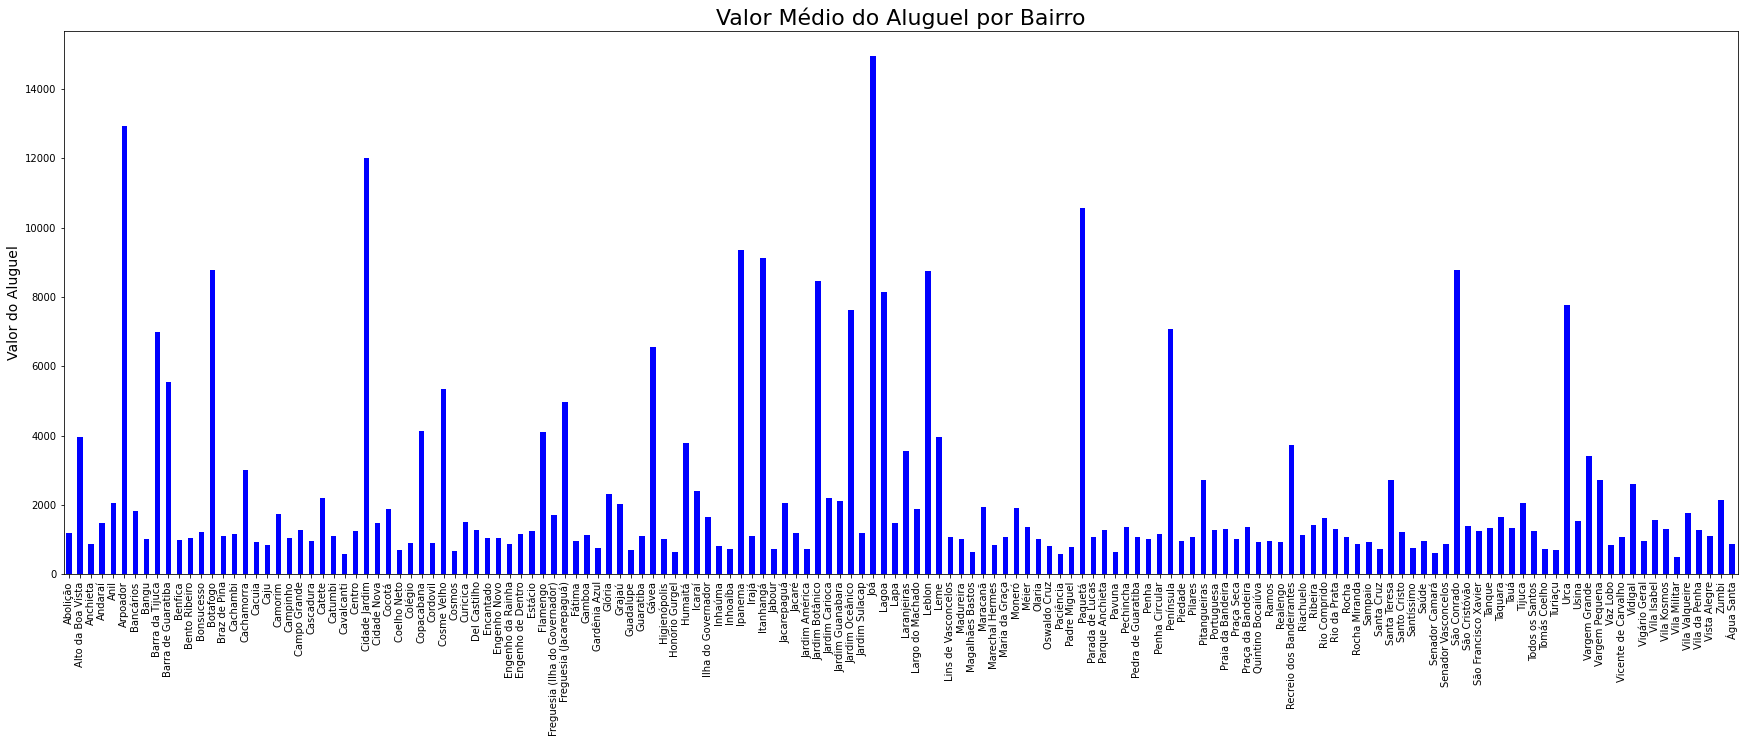

In [64]:
# Visualizando os dados em um gráfico
ax = grupo_bairros['Valor'].mean().plot.bar(color='blue')
ax.figure.set_size_inches(30, 10)
ax.set_title('Valor Médio do Aluguel por Bairro', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Valor do Aluguel', fontsize=14)

A visualização do gráfico não está muito boa porque tem muitas informações no eixo x (grande quantidade de bairros)

Text(0, 0.5, 'Valor do Aluguel')

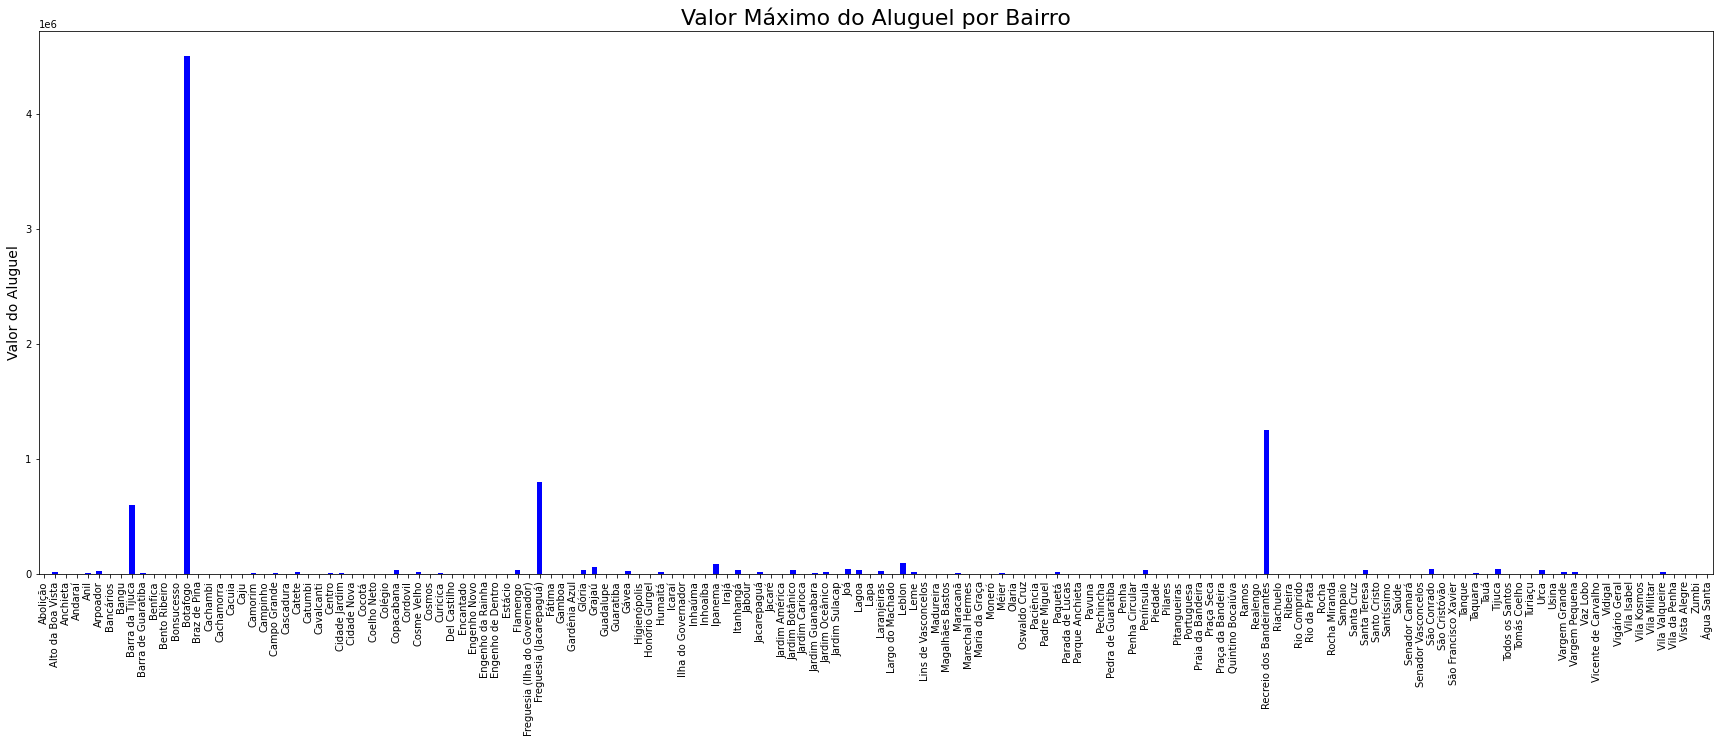

In [65]:
# Visualizando os dados em um gráfico
ax = grupo_bairros['Valor'].max().plot.bar(color='blue')
ax.figure.set_size_inches(30, 10)
ax.set_title('Valor Máximo do Aluguel por Bairro', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Valor do Aluguel', fontsize=14)

A visualização do gráfico está ruim também porque tem muitos dados, mas também porque tem quatro bairros com valores máximos muito maiores que os demais, o que deixa as barras dos outros bairros muito pequenas e difícil de visualizar.

#### Identificando e removendo Outliers

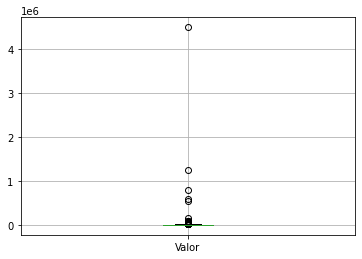

In [66]:
dados_residencial.boxplot(['Valor'])

Não é possível analisar a distribuição dos valores de aluguel por conta dos valores discrepantes, muito acima dos demais valores. Pode-se observar que os dados indicam que há imóveis com valores de aluguel acima de 500000, o que é absurdo. Esses valores possivelmente devem ser referentes ao valor de compra dos imóveis. Mas vamos analisar essas informações.

In [67]:
dados_residencial[dados_residencial['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
7595,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10596,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12611,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13791,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15459,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


Montando um novo boxplot com os valores removendo os outliers

In [68]:
# Salvando os valores em uma variável
valor = dados['Valor']

In [69]:
# Estabelecendo os intervalos de valores do boxplot 
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1

# Estabelecendo os valores limites do boxplot
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [70]:
# Selecionando os valores de acordo com os limites 
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
novos_dados = dados[selecao]

Fazendo um novo boxplot com os dados selecionados

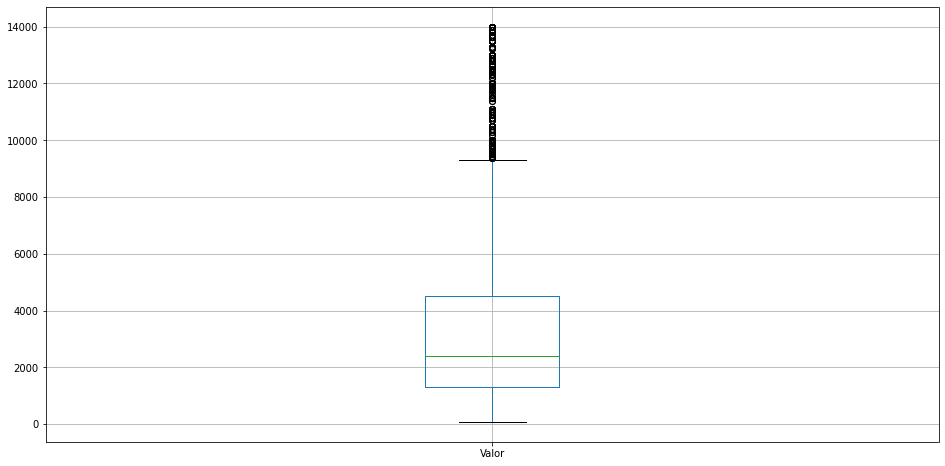

In [71]:
ax = novos_dados.boxplot(['Valor'])
ax.figure.set_size_inches(16, 8)

Construindo um histograma com os valores antes e depois da seleção

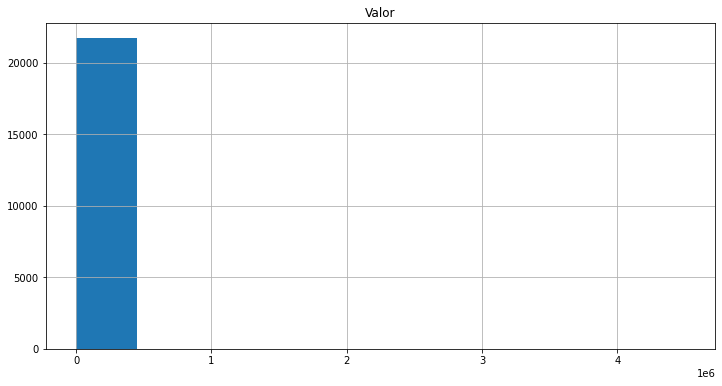

In [72]:
# Histograma antes da seleção
ax = dados_residencial.hist(['Valor'], figsize=(12,6))

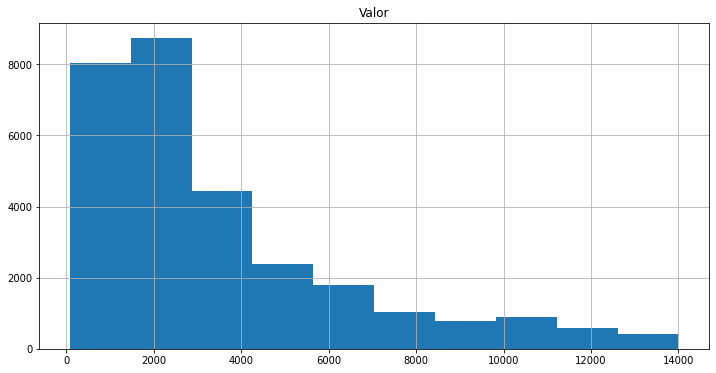

In [73]:
# Histograma depois da seleção
ax = novos_dados.hist(['Valor'], figsize=(12,6))

Fazendo o mesmo procedimento de remoção de outliers para cada tipo de imóvel

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


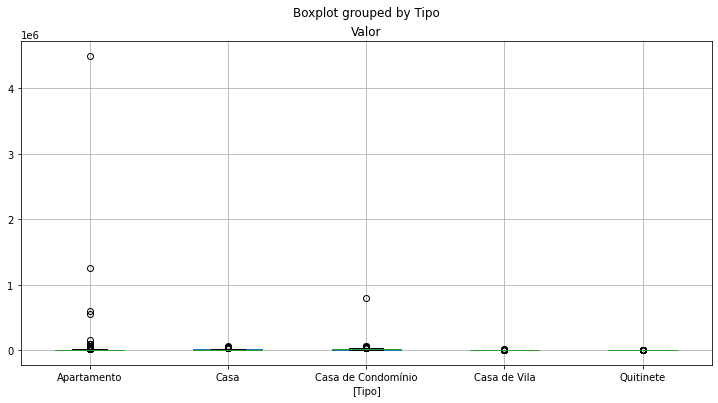

In [74]:
ax = dados_residencial.boxplot(['Valor'], by=['Tipo'])
ax.figure.set_size_inches(12, 6)

In [75]:
# Agrupando por tipo de imóvel
grupo_tipo = dados_residencial.groupby('Tipo')['Valor']

In [76]:
# Estabelecendo os intervalos de valores do boxplot 
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1

# Estabelecendo os valores limites do boxplot
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [77]:
# Criando um novo DataFrame com os dados selecionados

# DataFrame vazio
novos_dados = pd.DataFrame()

# Iterando por cada tipo de imóvel
for tipo in grupo_tipo.groups.keys():
  # Cria uma Series marcando True se for o tipo atual da iteração e False se não for
  eh_tipo = dados_residencial['Tipo'] == tipo
  # Cria uma Series marcando True se estiver dentro do limite e False se estiver fora
  eh_dentro_limite = (dados_residencial['Valor'] >= limite_inferior[tipo]) & (dados_residencial['Valor'] <= limite_superior[tipo])
  # Cria uma Series marcando True para quando as duas variáveis forem True e False caso contrário
  selecao = eh_tipo & eh_dentro_limite
  # Faz a seleção dos dados marcando True e salva em uma outra variável
  dados_selecao = dados_residencial[selecao]
  # Adiciona os dados selecionado no DataFrame criado
  novos_dados = pd.concat([novos_dados, dados_selecao])

In [78]:
# Visualizando o DataFrame criado
novos_dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


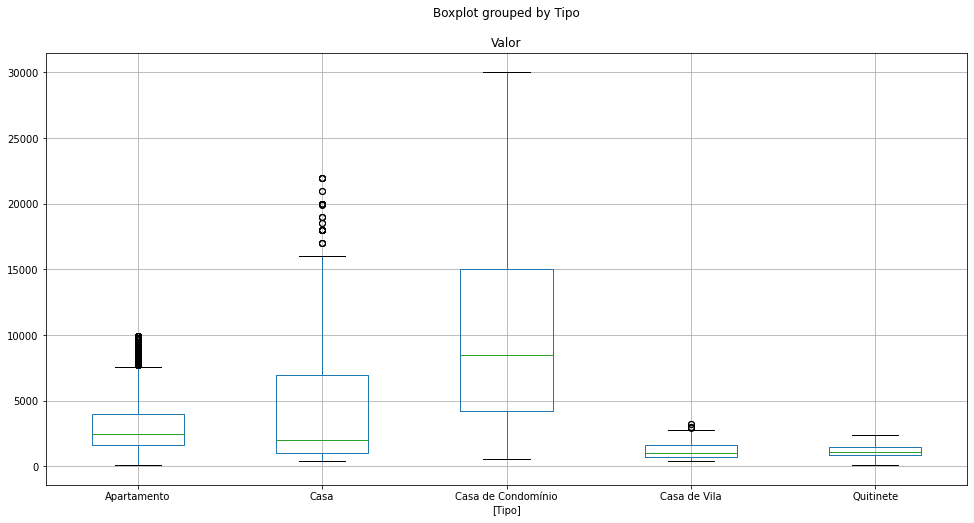

In [79]:
# Fazendo o boxplot com os dados tratados
ax = novos_dados.boxplot(['Valor'], by=['Tipo'])
ax.figure.set_size_inches(16, 8)